In [184]:
import sys
sys.path.append('../..')

import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from utils.quantum_circuit import prepare_state, get_state_vector, calculate_fidelity, simulate, draw_state

In [185]:
n = 4
x = ''.join(f"{n}" for n in np.random.randint(2, size=n))
y = ''.join(f"{n}" for n in np.random.randint(2, size=n))
y_prime = ''.join(f"{n}" for n in np.random.randint(2, size=n))

print(f"Alice bits: {x}")
print(f"Alice bases: {y}")
print(f"Bob bases: {y_prime}")

Alice bits: 0111
Alice bases: 1111
Bob bases: 1101


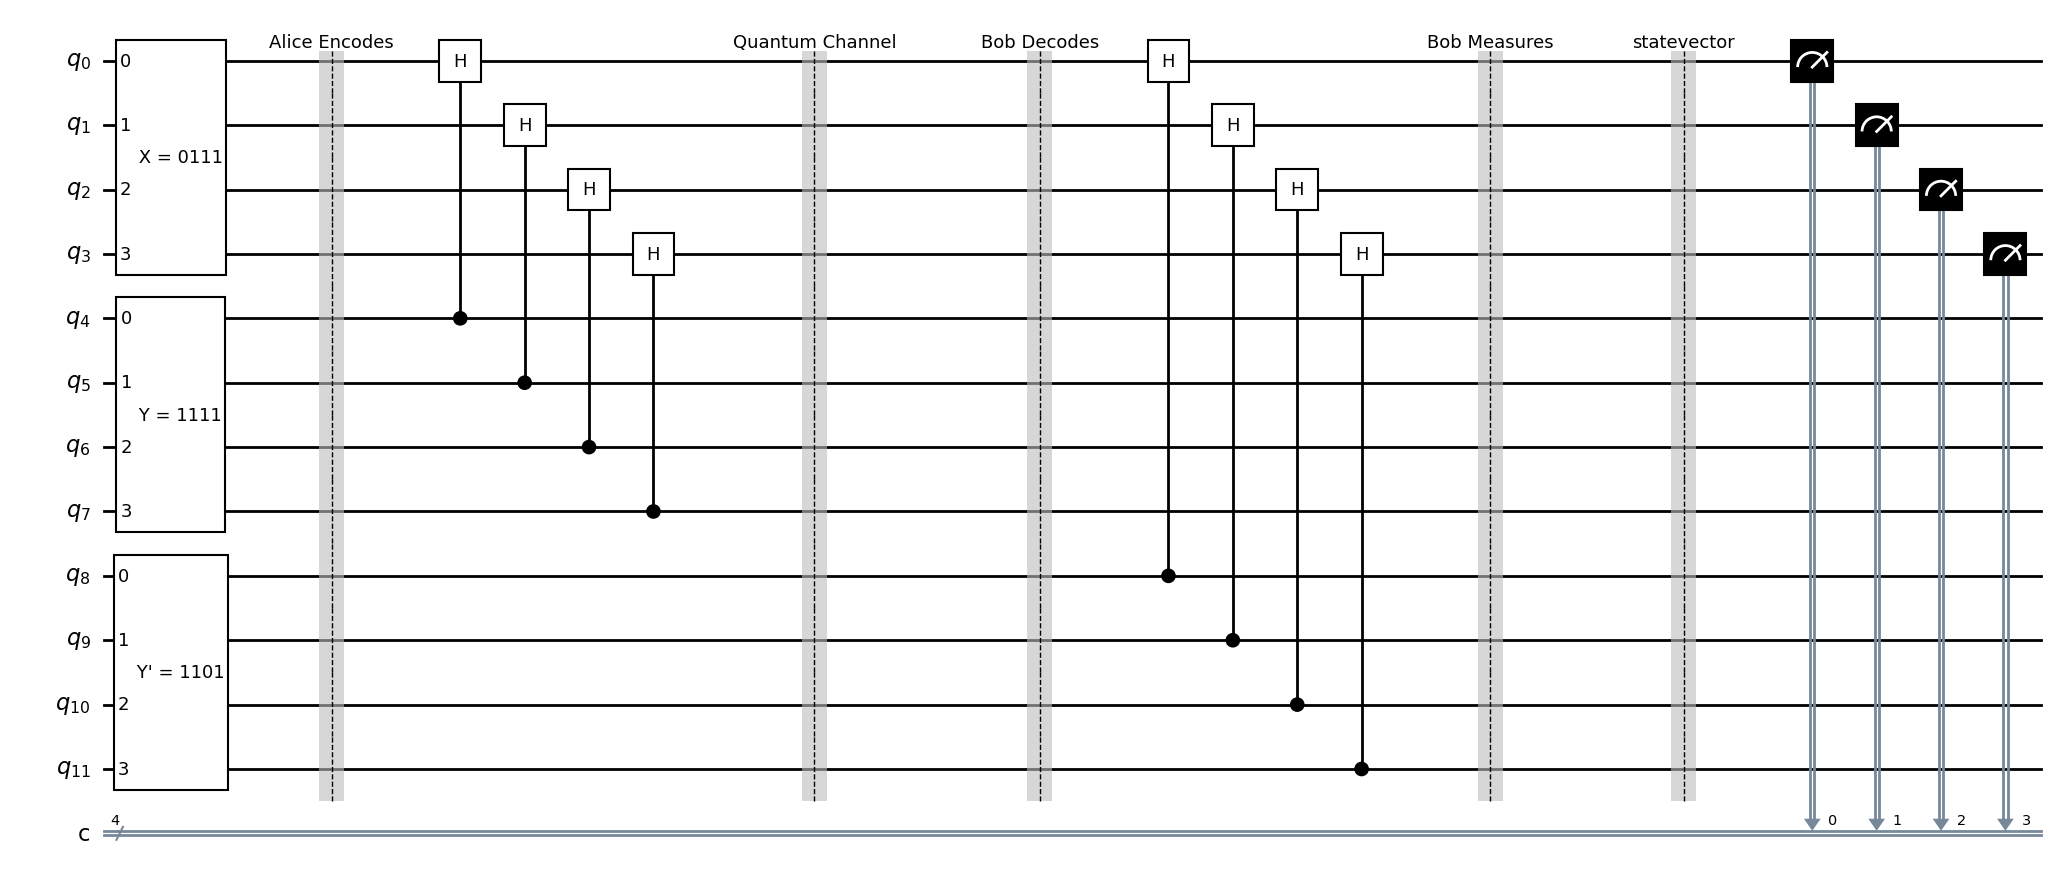

In [186]:
qc = QuantumCircuit(3*n, n)

# Alice prepares information state
qc.append(prepare_state(x, f" X = {x}"), [i for i in range(n)])

# Alice prepares basis state
qc.append(prepare_state(y, f" Y = {y}"), [i for i in range(n, 2*n)])

# # Bob prepares reference basis state
qc.append(prepare_state(y_prime, f" Y' = {y_prime}"), [i for i in range(2*n, 3*n)])

initial_state = get_state_vector(qc)

qc.barrier(label="Alice Encodes")

# Alice encodes information state based on basis state
# Encoding
for i in range(n):
    qc.ch(n+i, i)

qc.barrier(label="Quantum Channel")

qc.barrier(label="Bob Decodes")

# Bob tries to measure information state based on his basis state
# Decoding
for i in range(n):
    qc.ch(2*n+i, i)

qc.barrier(label="Bob Measures")

qc.save_statevector()
qc.measure([i for i in range(n)], [i for i in range(n)])

qc.draw("mpl", style="bw", fold=-1)

In [187]:
result = simulate(qc)

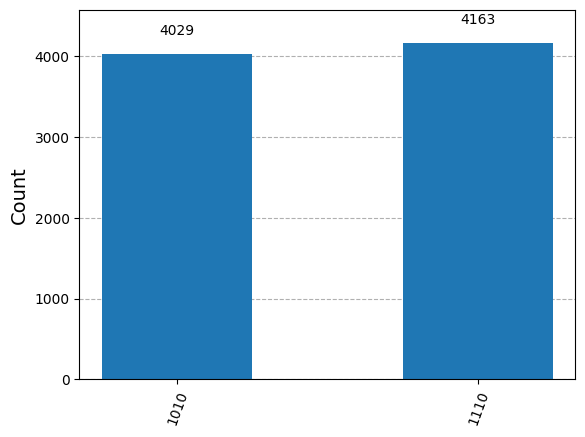

In [188]:
plot_histogram(result.get_counts())

In [189]:
draw_state(initial_state)

<IPython.core.display.Latex object>

In [190]:
last_state = result.get_statevector()
draw_state(last_state)

<IPython.core.display.Latex object>

In [191]:
calculate_fidelity(initial_state, last_state)

0.5000000000000024